In [7]:
#from skimage import data
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
from torch import nn
import numpy as np
model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
model.eval()
print(model)

Using cache found in /home/gauthiers/.cache/torch/hub/pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Compare with Alexnet and VGGnet: use a pretrained AlexNet and VGGnet. Take the first layer and look at the filters. Pad the filters to have 32x32 filters. 2D fourirer transform (absolute value) and visualize the filters. ——> compare with my filters 

In [20]:
def get_filters_visualization(first_layer_weights, num_row = 8 , num_col =8 , mode ='fourier'):
    '''
        Function that logs the metrics on MLFLOW
        Params: 
        filters: psi filters
        num_row: number of rows in the visualization
        num_col: number of columns in the visualization
        mode: fourier, real or imag
    '''
    f, axarr = plt.subplots(num_row,num_col, figsize=(20, 20))
    count = 0
    for i in range(0, num_row) :
        for j in range(0, num_col) :
            # adding padding
            filter = F.pad(input = first_layer_weights[count], pad = (11,10,11,10), mode='constant', value=0)
            
            # taking absolute value of filters
            filter = abs(filter.permute(2,1,0).cpu().detach().numpy())[:,:,1]
            
            if mode =='fourier':
                #x =np.fft.fftshift(filter)
                x = filter
            elif mode == 'real':
                x= np.fft.fftshift(np.fft.ifft2(filter)).real
            elif mode == 'imag':
                x= np.fft.fftshift(np.fft.ifft2(filter)).imag
            else:
                raise NotImplemented(f"Model {params['name']} not implemented")
            axarr[i,j].imshow(x)
            #axarr[i,j].set_title(f"J:{psi[count]['j']} L: {psi[count]['theta']}")
            axarr[i,j].axis('off')
            count = count +1
            axarr[i,j].set_xticklabels([])
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_aspect('equal')

    f.subplots_adjust(wspace=0, hspace=0.2)
    return f

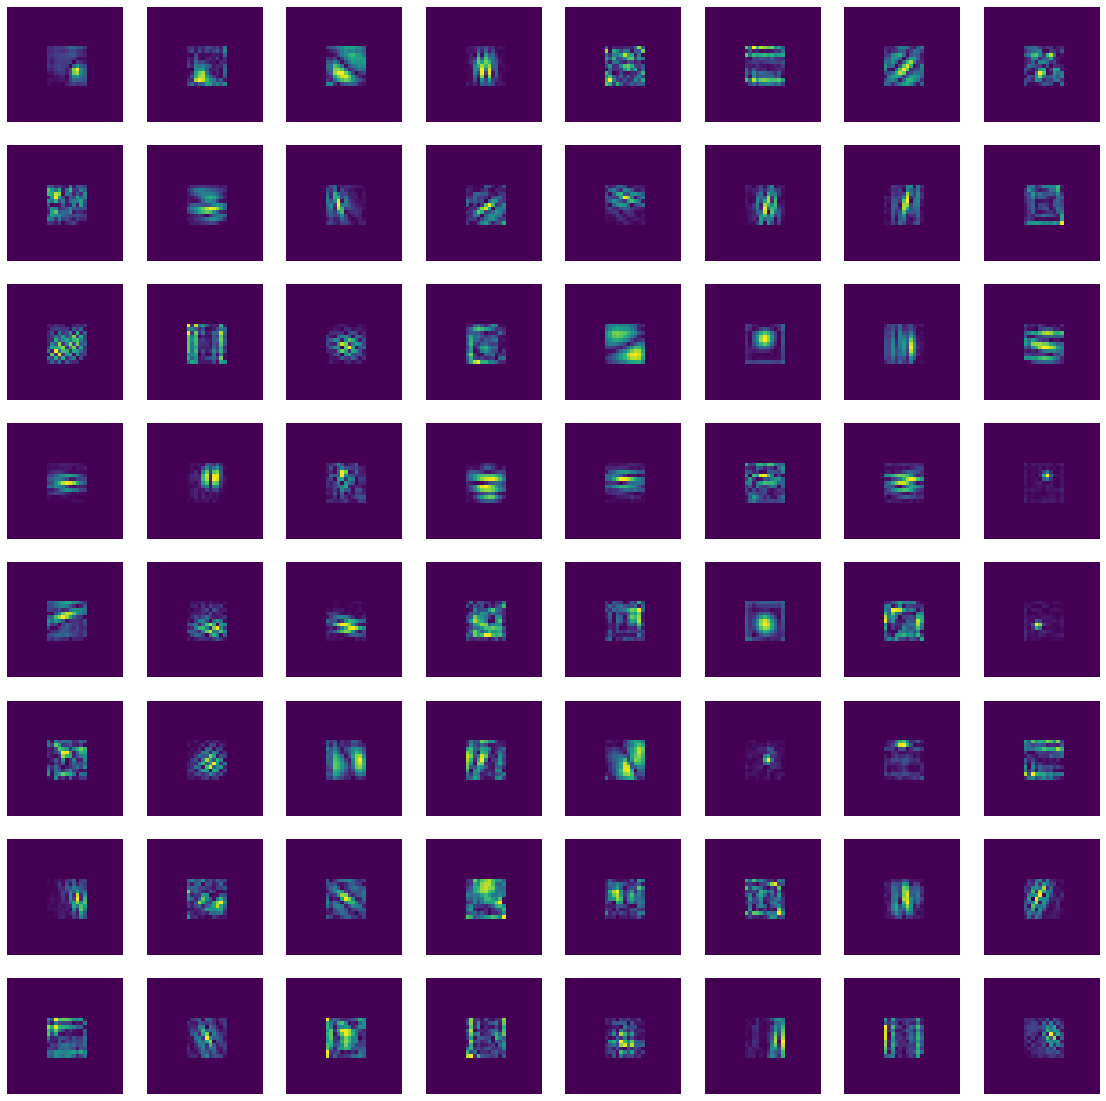

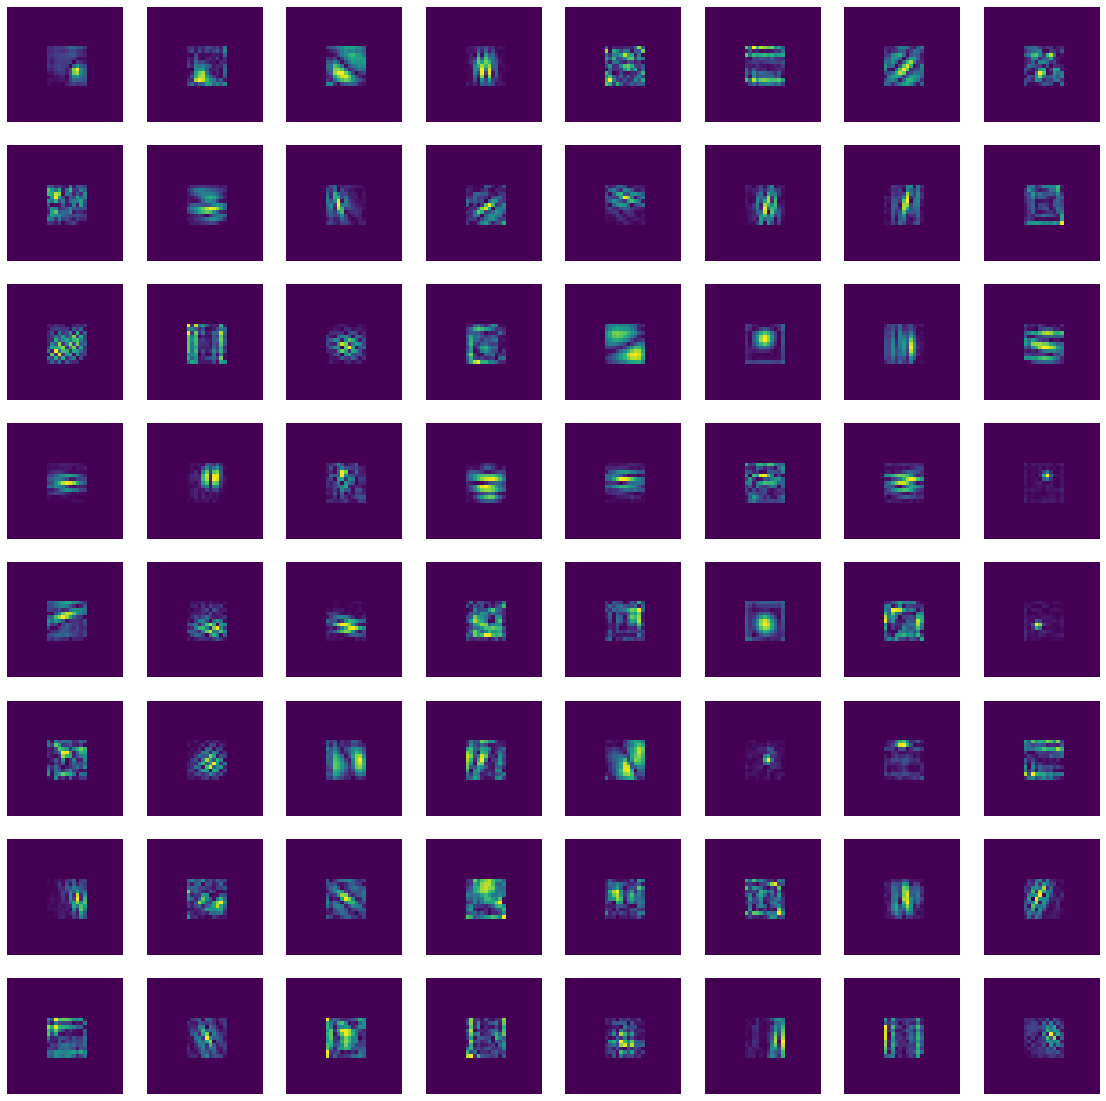

In [21]:
first_layer = model.features[0]
first_layer_weights = first_layer.weight
get_filters_visualization(first_layer_weights, mode='fourier')